# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Benjamin Escobar Jaramillo
*Métodos computacionales 2025-I*

---

### ***Imports***

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [ ]:
#Vamos con 16 bits!!
def myint(n): #Entra un binario, sale un entero. (Ingresarlo sin el 0b!!!!)
  #el Plan es este: Convertirlo en str, y a partir de su posición, saber que valor de potencia de 2 sumar!
  valor=0
  n=str(n)
  n=n[::-1]                  #Lo ponemos al revés para que el indice 0, sea dos a la 0, el uno sea dos a la 1, etc...

  for i in range(0,len(n)):
    valor+= 2**(i)*int(n[i])    #Por lo cual, elevamos al numero, y suma si valor en ese punto es igual a 1

  return valor           #Como la suma es conmutativa, no hay que voltear nada

In [ ]:
myint(1000011100001)

4321

In [ ]:
int(0b1000011100001)==myint(1000011100001)     #Confirmado nuestro generador de binario!

True

# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [ ]:
#precision doble! damas y caballeros, tenemos signos, decimales y mucho mas! asi que manos a la obra.
def number64(n):
  n=str(n) #Trabajemos con stringssss! asi podemos usar sus indices!

  signo="+"             #aqui guardamos el signo!
  if n[0]==1:
    signo="-"

  exponente=""   #Sigamos con el exponente! con un total de 11 bits!
  for i in range(1,12): #11 bits, el 0 era el del signo
    exponente+=n[i]  # y listo ya tenemos tambien el exponente separado, sigue...!

    mantisa=""
  for i in range(12,64): #y listo, aca esta nuestra mantiza guardada
    mantisa+=n[i]


  #Bien! ya tenemos signo, exponente y mantisa separados. Solo queda operar
  #1) Valor del exponente! (Usemos nuestro codigo anterior!!)

  exponentefinal=((myint(int(exponente)))-1023) #Por definicion, se le resta el 1023

  #Listo, ya tenemos exponente, ya tenemos el signo, queda la mantisa!!!

  valormantisa=0         #Ahora calculemos la mantisa!

  for i in range(0,52):
    if mantisa[i]==str(1):           #Voila, los que sean 1 sobreviven, los 0`s mueren!!!
      valormantisa= valormantisa + (1 / (2**(i+1)))
    else:
      continue

  valormantisa=valormantisa+1+1/(2**52)              #Y se le suma el 1 por convencion!  #Ya tenemos nuestra mantiza

          #Y listo! solo queda seguir la formula! mantiza x 2**exponente, y el signo!
  casitotal=valormantisa*(2**(exponentefinal))
  casitotal=str(casitotal)  #Lo hacemos strings para...
  total=signo+casitotal     #unirlo al signo!!!!
  return float(total)   #Y el finnnn!!! Logramos hacerlo!! (QUE TEDIOSO! WOW)


In [ ]:
number64("0100000000111011100100001111111111111111111111111111111111111111")

27.56640625

# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



In [ ]:
def cuatro_arctanpi(x,tol): #Esta función calclula el valor de 4*arctan, Recibe el x a calcular, y aun mejor! la tolerancia
                          #De este modo, podemos comparar con cualquier tolerancia, y ver cuantas iteraciones se tarda
  valor=0
  i=1
  while True:             #Hacemos que se ejecute infinatemente hasta que ocurra nuestra condicion deseada
    valor+=(((-1)**(i+1))*((x**(2*i-1))/(2*i-1)))
    if abs((4*valor)-np.pi)<tol:                                   # y voilà la condición deseada.
      return print(f"el valor obtenido (multiplicado por 4) fue {4*valor}, con {i} iteraciones")
    i+=1

In [ ]:
cuatro_arctanpi(1,1e-3)  #Rayos!!! Acaso ven eso?? 1000 iteraciones!
cuatro_arctanpi(1,1e-4)  #Y aun peor (logicamente) con una precision mayor! Si que se tarda en converger esta serie...

el valor obtenido (multiplicado por 4) fue 3.140592653839794, con 1000 iteraciones
el valor obtenido (multiplicado por 4) fue 3.1414926535900345, con 10000 iteraciones


In [ ]:
def suma_arctan(x1,x2,tol): #Aahora necesita dos datos iniciales!
  valor1=0
  valor2=0       #Guardaremos aqui los valores individuales

  i=1         #y aca las iteraciones

  while True:

    valor1+=(((-1)**(i+1))*((x1**(2*i-1))/(2*i-1)))
    valor2+=(((-1)**(i+1))*((x2**(2*i-1))/(2*i-1)))

    if abs( 4*(valor1+valor2) - np.pi )<tol:
      return print(f"El valor aproximado fue {4*(valor1+valor2)}, en un total de {i} iteraciones")
    i+=1

In [ ]:
suma_arctan(1/2,1/3,1e-3)    #Rayos! Mejoro de una manera pero impresionante!!!! casi mil iteraciones menos!
suma_arctan(1/2,1/3,1e-6)    #Y hasta con precisiones mayores, sigue siendo realmente pequeño el numero de iteraciones!

El valor aproximado fue 3.1408505617610554, en un total de 4 iteraciones
El valor aproximado fue 3.1415929813345667, en un total de 9 iteraciones


In [ ]:
#viendo ahora, lo especifico de nuestras funciones, mejor hagamos que unicamente pidan la tolerancia, lo demas es fijo!
def arctan_precisa(tol):   #Le entra la tolerancia, devuelve el valor asociado a la comparacion y el numero de iteraciones.
  x1=1/5
  x2=1/(239)

  valor1=0
  valor2=0
  i=1

  while True:

    valor1+=(((-1)**(i+1))*((x1**(2*i-1))/(2*i-1)))
    valor2+=(((-1)**(i+1))*((x2**(2*i-1))/(2*i-1)))

    if abs( 4*((4*valor1)-valor2) - np.pi )<tol:
      return print(f"El valor aproximado fue {4*(valor1+valor2)}, en un total de {i} iteraciones")
    i+=1

In [ ]:
arctan_precisa(1e-3)  # Y efectivamente... Como nos lo prometieron, damas y caballeros, tenemos una mayor velocidad de precisión!
arctan_precisa(1e-6)

El valor aproximado fue 0.8060696373406063, en un total de 2 iteraciones
El valor aproximado fue 0.8063183230559179, en un total de 4 iteraciones


Text(0, 0.5, 'Precision')

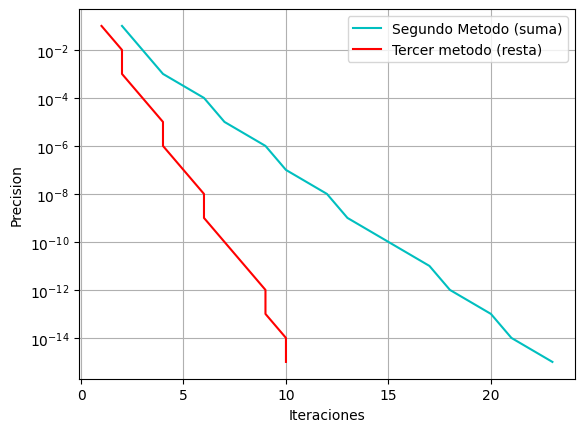

In [ ]:
#Ahora bien... como cientificos que somos, que mejor forma que comparar datos que, con graficas!!!
#A) No vamos a incluir logicamente al primer metodo, porque es mas que evidente su deficiencia (1000 iteraciones? Por Dios!!)


#Paso 1; editemos todos nuestros codigos, para que nos entreguen unicamente el numero de iteraciones.

def suma_arctan2(tol):
  valor1=0
  valor2=0

  x1=1/2
  x2=1/3



  i=1

  while True:

    valor1+=(((-1)**(i+1))*((x1**(2*i-1))/(2*i-1)))
    valor2+=(((-1)**(i+1))*((x2**(2*i-1))/(2*i-1)))

    if abs( 4*(valor1+valor2) - np.pi )<tol:
      return i                               #Solo cambiamos el return
    i+=1

def arctan_precisa2(tol):   #Le entra la tolerancia, devuelve el valor asociado a la comparacion y el numero de iteraciones.
  x1=1/5
  x2=1/(239)

  valor1=0
  valor2=0
  i=1

  while True:

    valor1+=(((-1)**(i+1))*((x1**(2*i-1))/(2*i-1)))
    valor2+=(((-1)**(i+1))*((x2**(2*i-1))/(2*i-1)))

    if abs( 4*((4*valor1)-valor2) - np.pi )<tol:
      return i                                              # Igual
    i+=1

  #Ahora hacemos nuestro eje x!
ejex1=[]
ejex2=[]
tolerancias=np.logspace(-1, -15, 15)
for i in tolerancias:
  ejex1.append(suma_arctan2(i))
for i in tolerancias:
  ejex2.append(arctan_precisa2(i))

plt.semilogy(ejex1, tolerancias,label="Segundo Metodo (suma)",color="c")
plt.semilogy(ejex2, tolerancias,label="Tercer metodo (resta)",color="r")
plt.legend()
plt.grid()
plt.xlabel("Iteraciones")
plt.ylabel("Precision")

In [ ]:
#Ahora, podemos visualizar facilmente, como el tercer metodo, converge en menos iteraciones que el segundo (es mas eficiente!)

# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [ ]:
def menosexp(x):    #Funcion en series de e**-x. Recibe un x, devuelve la aproximación!
  valor=0              #Aqui almacenamos el total
  termino=0            #y aqui el termino en ese punto! con el proposito de parar cuando alcance la condicion anteriormente propuesta
  i=0                  #y nuestro contador

  while True:
    valor=valor+(((-1)**i)*(((x)**i)/math.factorial(i)))
    termino=((-x)**(i+1))/(math.factorial(i+1))

    if abs(termino) <= abs(valor*(1e-7)):
      return valor
    i+=1



print(np.exp(-0.5))
print(menosexp(0.5))      #Como podemos obserar, con la tolerancia proporcionada, tiene una buena convergencia.

0.6065306597126334
0.6065306648375496


In [ ]:
def menosexp_manual(x,n):    #y para comparaciones futuras, la misma funcion, pero que se le ingrese manualmente el n.
  valor=0
  for i in range(n+1):
    valor+=(((-1)**i)*(((x)**i)/math.factorial(i)))
  return valor



print(np.exp(-0.5))
print(menosexp_manual(0.5,120))      #Logicamente, mas numero de iteraciones, mas precision alcanzada.

0.6065306597126334
0.6065306597126333


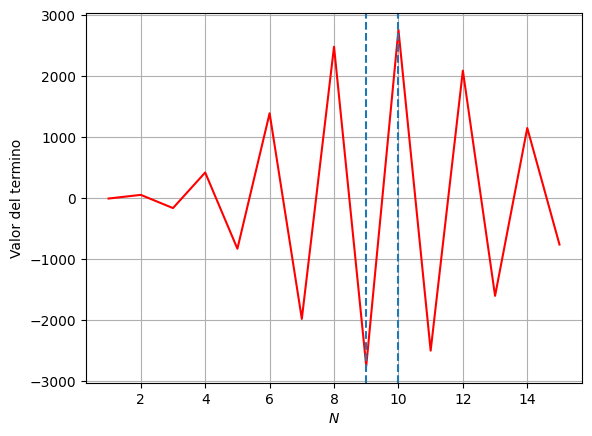

In [ ]:
#Ahora observemos aquellos terminos substractivos de los que tanto se habla! por lo cual, nuestra funcion no debe sacar la suma
#sino los valores individuales!
x=10


def terminos_menos_exp(x,n):
  valor=0                         #Definimos una funcion analoga a la menosexp, pero no suma los valores, devuelve el valor en el punto i
  for i in range(n+1):             #Ademas, en este caso, le permitimos la asignación manual de N, para ver la comparación
    valor= ((-1)**i)*(((x)**i)/math.factorial(i))
  return valor



ejey=[]
ejeN=np.linspace(1,15,15)
for i in ejeN:                  #Y ahora hacemos nuestra grafica (debemos poner int(i), pues la i, solo recibe enteros)
  ejey.append(terminos_menos_exp(x,int(i)))


plt.plot(ejeN,ejey,linestyle="-",color="red")
plt.xlabel("$N$")
plt.ylabel("Valor del termino")
plt.axvline(x-1,linestyle="--") #Y encontramos nuestra cancelacion substractiva casi perfecta n=x-1
plt.axvline(x,linestyle="--")
plt.grid()

In [ ]:
"""A continuación, veamos númericamente este fenomeno, emplearemos a x=10, y estaremos lindando las zonas de n=x, y de n=x-1"""

a=terminos_menos_exp(x,x)  #como x es =10, vamos a recibir el valor del termino en la decima iteracion
b=terminos_menos_exp(x,x-1) #Y en la iteracion anterior!
c=a+b
print(a)
print(-b)
print(c)

#Rayos! Quien sabe que este ocurriendo en el epsilon de la maquina, pero la susbtracción es praticamente PERFECTA! y solo es un termino atras!

2755.731922398589
2755.731922398589
0.0


In [ ]:
#Observemos si la identidad e**-x = 1/e**x mejora la precisión.

def exponencial(x,n):  #Otra vez le ingresamos una x, y un maximo de iteraciones (Manual, para comparar precision)
  valor=0
  for i in range(n+1):
    valor+=(x**i)/math.factorial(i)
  return 1/valor #Y aca tenemos la transformación!!

In [ ]:
print(f"{menosexp_manual(0.5,120)} (Primer método)")
print(f'{exponencial(0.5,120)} (Nuevo método)')     # Como podemos observar, en x pequeños, ambas precisiones satisfacen muy bien
print(np.exp(-0.5))

0.6065306597126333 (Primer método)
0.6065306597126335 (Nuevo método)
0.6065306597126334


In [ ]:
print(f"{menosexp_manual(60,120)} (Primer método)")
print(f'{exponencial(60,120)} (Nuevo método)')    #Sin embargo, note como en x mas grandes, el primer metodo falla terriblemente!!
print(f"{np.exp(-60)} (Valor teórico)")      #Por lo cual, con la ingeniosa identidad, podriamos decir que si, obtenemos mayor precision

118582066388242.88 (Primer método)
8.75651076272304e-27 (Nuevo método)
8.75651076269652e-27 (Valor teórico)


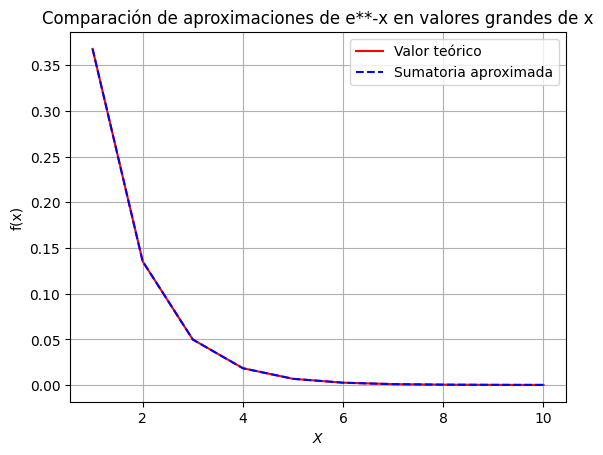

In [ ]:
#Vamos a realizar primero una grafica interesante, para mover progresivamente los x, como bloques enteros de 1 a 100.
#Por lo cual, graficaremos lo siguiente: Una grafica corresponde al valor preciso de e**x, en el x mencionado.
#La otra, corresponde al valor experimental con la precisión. Asi podremos observar cuando esta comienza a perderse!

ejex = np.arange(1,11)

y1=np.exp((-1)*ejex)
y2=[]
for i in ejex:
  y2.append(menosexp(int(i)))

plt.plot(ejex,y1,color="red",label="Valor teórico")
plt.plot(ejex,y2,linestyle="--",color="blue",label="Sumatoria aproximada")
plt.title("Comparación de aproximaciones de e**-x en valores grandes de x")
plt.ylabel("f(x)")
plt.xlabel("$X$")
plt.grid()
plt.legend()

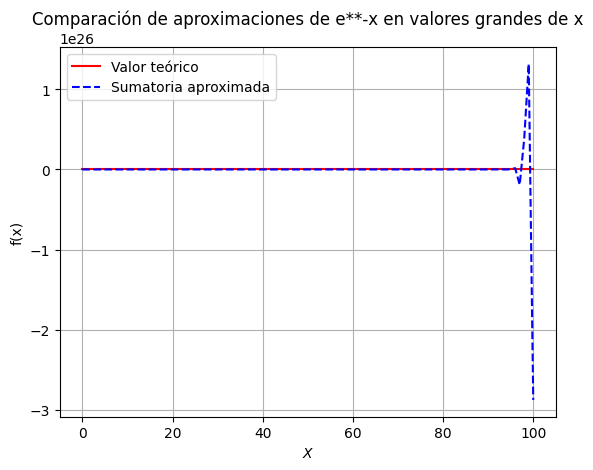

In [ ]:
#WOW Note que para los 10 primeros x, la precisión es innegable! todo parece marchar bien, vamonos ahora con 100!

ejex = np.arange(0,101)   #Solo cambiamos aqui el max x

y1=np.exp((-1)*ejex)
y2=[]
for i in ejex:
  y2.append(menosexp(int(i)))

plt.plot(ejex,y1,color="red",label="Valor teórico")
plt.plot(ejex,y2,linestyle="--",color="blue",label="Sumatoria aproximada")
plt.title("Comparación de aproximaciones de e**-x en valores grandes de x")
plt.ylabel("f(x)")
plt.xlabel("$X$")
plt.grid()
plt.legend()

In [ ]:
y2=np.array(y2)
y1=np.array(y1)

In [ ]:
#WOW! Si que hay cambios notorios, comienza a aparecer una divergencia...!!! (muy clavada)
#Empleemos un dataframe para descubrir cuando ocurre.
data=pd.DataFrame({"Valor teórico":y1,"Valor experimental":y2})

filtrado= data[abs(data['Valor teórico']-data["Valor experimental"])<1e-7] #filtramos para la tolerancia!!
filtrado

,Valor teórico,Valor experimental
0,1.000000e+00,1.000000e+00
1,3.678794e-01,3.678795e-01
2,1.353353e-01,1.353353e-01
3,4.978707e-02,4.978707e-02
4,1.831564e-02,1.831564e-02
5,6.737947e-03,6.737947e-03
6,2.478752e-03,2.478752e-03
7,9.118820e-04,9.118820e-04
8,3.354626e-04,3.354626e-04
9,1.234098e-04,1.234098e-04


In [ ]:
#Ah ha! observamos que a partir del valor 23, empezamos a fluctuar en una tolerancia dada, es decir, a partir de ese punto,
#comienza a dar breves brincos, y empieza a alejarse

In [ ]:
filtradoMayor= data[abs(data['Valor teórico']-data["Valor experimental"])<0.1]
filtradoMayor  #Ahora notemos que a partir de valores de x>36, la diferencia entre ellos es aun mayor que 0.1!
#Por lo cual a partir de este valor, podriamos decir que la serie comienza formalmente a diverger (aunque con bastante gabela!)

,Valor teórico,Valor experimental
0,1.000000e+00,1.000000e+00
1,3.678794e-01,3.678795e-01
2,1.353353e-01,1.353353e-01
3,4.978707e-02,4.978707e-02
4,1.831564e-02,1.831564e-02
5,6.737947e-03,6.737947e-03
6,2.478752e-03,2.478752e-03
7,9.118820e-04,9.118820e-04
8,3.354626e-04,3.354626e-04
9,1.234098e-04,1.234098e-04


In [ ]:
#AHORA OBSERVE LA SIGUIENTE CURIOSIDAD, NO HACE PARTE DEL EJERCICIO, PERO RESULTA REALMENTE INTERESANTE

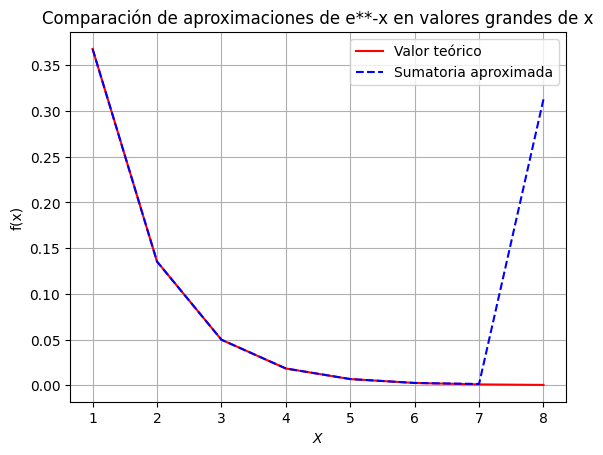

In [ ]:
#Recordemos la funcion que hicimos anteriormente, en forma MANUAL, es decir, calcula la sumatoria con un numero de iteraciones seleccionado
#SUPONIAMOS que este metodo era mas preciso! pues si le dabamos iteraciones ridiculas (100 iteraciones!) pensabamos que la precision
#iba aumentar de sobremanera, sin embargo...

ejex = np.arange(1,9) #Voilà los x a evaluar

y1=np.exp((-1)*ejex)          #Valores teóricos
y2=menosexp_manual(ejex,140)  #Estandar manual de alta precision (como si tendiese al ifninito en terminos computacionaels)

plt.plot(ejex,y1,color="red",label="Valor teórico")
plt.plot(ejex,y2,linestyle="--",color="blue",label="Sumatoria aproximada")
plt.title("Comparación de aproximaciones de e**-x en valores grandes de x")
plt.ylabel("f(x)")
plt.xlabel("$X$")
plt.grid()
plt.legend()

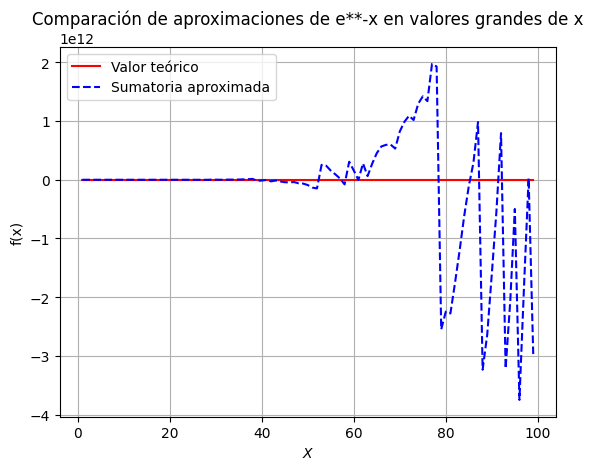

In [ ]:
#Vaya! pueden osbervar? Pusimos la precision de la funcion casi al maximo posible, es decir, una suerte de infinito computacional
#Por lo tanto, no es cuestion de precision! la serie empieza a alejarse de los valores correspondientes en x no muy grandes!
#En este caso, con fines de observar mejor el comportamiento, lo hicimos de 1 a 8, note que en 8, ya se aleja totalmente de la aproximacion
#Asi que, si nos vamos mas lejos...

ejex = np.arange(1,100)   #Es solo cambiar el ultimo nùmero para comparar los x

y1=np.exp((-1)*ejex)
y2=menosexp_manual(ejex,120)

plt.plot(ejex,y1,color="red",label="Valor teórico")
plt.plot(ejex,y2,linestyle="--",color="blue",label="Sumatoria aproximada")
plt.title("Comparación de aproximaciones de e**-x en valores grandes de x")
plt.ylabel("f(x)")
plt.xlabel("$X$")
plt.grid()
plt.legend()

In [ ]:
#Rayos! Cuanto caos! en verdad la función diverge totalmente en estos x a pesar de tener "mas precision" (??)!
#Sospechamos que, todo esto se debe a las limitaciones computacionales de nuestra maquina. Tener un epsilon limitado, (aunque muy diminuto)
#podria traernos problemas a la hora de evaluar, sumando y restando aparentes 0`s! ademas, ya vimos los delicados valores substractivos
#Note que con una convergencia supuestamente mayor (mas iteraciones), la divergencia es aun peor!
#acaso en esta funcion, mas iteraciones no significa mas precision (pues en calculo, si lo es!)

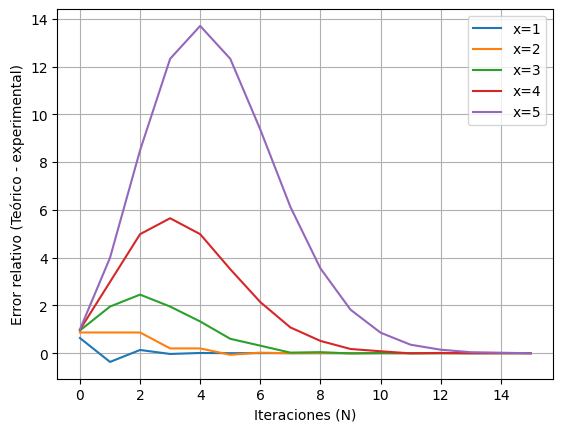

In [ ]:
#Ahora bien, ya que vamos a variar el N, lo que necesitamos es nuestra funcion MANUAL!
N = np.arange(0,16)       #Nuestro eje x representa a N
#Nuestros x a elegir serán...:
x1=1
x2=2
x3=3
x4=4
x5=5
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]

#por lo cual, nuestros ejes y seràn:
for i in N:
  y1.append(((abs(menosexp_manual(x1,int(i)))-np.exp(-x1))))
  y2.append(((abs(menosexp_manual(x2,int(i)))-np.exp(-x2))))
  y3.append(((abs(menosexp_manual(x3,int(i)))-np.exp(-x3))))  #Aca estamos calculando la diferencia! como avaces los valores estallan
  y4.append(((abs(menosexp_manual(x4,int(i)))-np.exp(-x4))))  #una comparacion porcentual se saldría de la unidad
  y5.append(((abs(menosexp_manual(x5,int(i)))-np.exp(-x5))))

plt.plot(N,y1,label="x=1")
plt.plot(N,y2,label="x=2")
plt.plot(N,y3,label="x=3")
plt.plot(N,y4,label="x=4")
plt.plot(N,y5,label="x=5")
plt.legend()
plt.xlabel("Iteraciones (N)")
plt.ylabel("Error relativo (Teórico - experimental)")
plt.grid()

In [ ]:
#Todo parece indicar, que entre mas grande sea el X, mayor numero de iteraciones requiere el programa para converger.

np.float64(13.701595386334251)

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [ ]:
f = lambda x: x*(x-1) #Hacemos nuestra funcion f(x)

def df(f,x,delta):       #Recibe la función, el valor a evaluar, y el delta a elegir. Devuelve la derivada de f evaluada en x
  return ((f(x+delta)-f(x))/(delta))

dfT =lambda x: 2*x-1      #dfT siginifica Derivada Teorica, para comparar

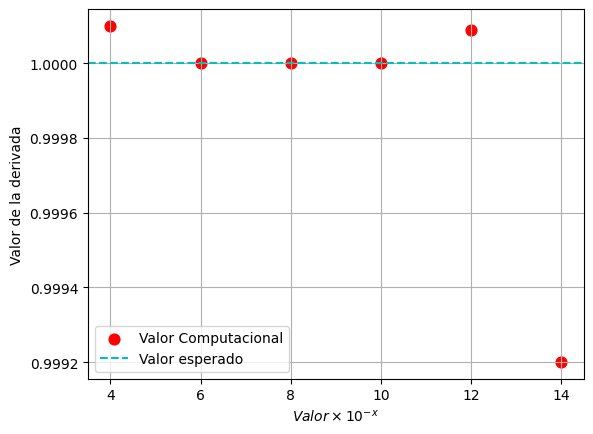

In [ ]:
#Ahora, comparemos graficamente!!
delta=[1e-4,1e-6,1e-8,1e-10,1e-12,1e-14] #Para evaluar
deltay=[4,6,8,10,12,14] #Para mostrar
xinformatico=[]

for i in delta:
  xinformatico.append(df(f,1,i))
plt.scatter(deltay, xinformatico,color="r", label="Valor Computacional",s=60)
plt.ylabel("Valor de la derivada")
plt.xlabel(r"$ Valor \times 10^{-x}$")
plt.axhline(y=dfT(1),color="c",linestyle="--",label="Valor esperado")
plt.legend()
plt.grid()

In [ ]:
#Al principio, comienza con un comportamiento natural; deltas muy grandes traen poca precision
#Luego, una muy bella estabilidad! siguen haciendose mas pequeños los deltas, y obtenemos Valores mas precisos con la derivada teorica
#Pero... Un momento! los deltas siguen haciendose pequeños!, pero la aproximación se aleja del valor preciso! Que esta ocurriendo!!!

#Incialmente, al hacer la funcion df, era logico que no iba a coincidir perfectamente, pues el delta debia tender terriblemente a cero,
#Por lo cual, habria una logica discrepancia entre estos valores, como podra observar a continuación

In [ ]:
df(f,1,1e-2) - dfT(1)  #Como podemos observar, Hay diferencia, pues el delta, no es lo suficientemente pequeño

0.010000000000000897

In [ ]:
df(f,1,1e-13) - dfT(1) # pero observemos que, en deltas muy pequeños... El valor termina siendo inclusive menor al teorico!

-0.0007992778372593046

In [ ]:
df(f,1,1e-14) - dfT(1) #Si, es menor....

-0.0007992778373491216

In [ ]:
df(f,1,1e-15) - dfT(1) #pero despues vuelve... a ser mayor...?

0.11022302462515765

In [ ]:
#Teorizamos que tiene que ver con el epsilon de la maquina! y el como trabaja con valores tan pequeños
""" Sospechamos que, en estas condiciones, los valores tienden a ser tan pequeños, que la maquina comienza a hacer aproximaciones.
como nuestros numeros en el denominador son tan diminutos, estas proximaciones podrian llevar a cambios abruptos en el comportamiento
pues es una pequeña lucha entre numerador y denominador; quien es mas pequeño? crecemos? o bajamos?

asi que se teoriza que, dadas las aproximaciones necesarias por las limitantes del epsilon, en numeros muy pequeños, hay una breve rivalida
entre el numerador y el denominador, quienes decidiran si crecera el valor, o decrecerá.
"""